<a href="https://colab.research.google.com/github/alxanderpierre/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_Copy_of_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=44.91547415574031, mobile=True), User(purchased=True, time_on_site=11.715129805655582, mobile=True), User(purchased=False, time_on_site=44.679153615954284, mobile=False), User(purchased=False, time_on_site=284.6435544677671, mobile=True), User(purchased=False, time_on_site=144.19398136663895, mobile=True), User(purchased=False, time_on_site=241.01581425079434, mobile=True), User(purchased=False, time_on_site=8.707914364080754, mobile=True), User(purchased=True, time_on_site=91.66076064872681, mobile=True), User(purchased=True, time_on_site=107.53710000065196, mobile=True), User(purchased=True, time_on_site=495.5506560022871, mobile=False)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,44.915474,True
1,True,11.715130,True
2,False,44.679154,False
3,False,284.643554,True
4,False,144.193981,True


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.249928961120937,5.627081940800887,6.496653035290484,6.526716619043654,6.952903618465172,7.22147151144997,7.272037206667504,7.625571882394923,7.795542966485417,8.130949315314298,8.289061021715238,8.33125762556583,8.707914364080754,9.08637510768499,9.424742825174178,9.549218137203965,10.22335497382469,10.262142762571807,10.486559420811496,11.715129805655582,11.848022806420232,11.942915455910304,12.01533565808556,12.201393397960342,12.205491766598772,12.463134742254297,12.688924031426065,12.690683935488826,13.302003950423392,13.663680884586714,14.392300141409647,14.682774845832117,14.906521841395413,15.274483558953849,15.635161405444352,15.7301935232687,16.168281430446658,16.453240065685716,16.74658623227697,17.475301791819177,...,500.1952190545858,503.5577240309591,505.3447399742965,507.6421231285969,512.975478702399,519.9895681246162,520.2746637870551,522.1634736327238,523.4746295467997,525.1357102793643,525.6083515411972,530.7704405887653,535.7546926781162,538.6018004112472,540.0713367230709,541.8274226296463,548.3831860138728,549.2242336054239,549.5338916991492,549.852576176171,550.6277294674093,551.1856162163358,554.0718670303528,555.3324002684064,555.5979896123752,557.0495452609715,558.0083478848992,560.775159122365,562.1747179098462,565.2183643216856,576.7109807614399,579.5776486931062,580.0814066105404,582.9519706687523,585.2441855007177,588.9427087057037,593.0777836590336,594.3345917098127,595.7163712422251,597.9936428117326
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,1,1,0
True,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,1


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

TypeError: ignored

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alxanderpierre/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
print(df.shape)
df.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
# just douple checkin to make sure that i dont have any missing data
df.isnull().sum()

Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64

In [0]:
pd.crosstab(df.exercise_time, df.age,)

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [0]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.2
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.180
botocore==1.12.180
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.10
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.2
dlib==19.16.0
dm-sonnet==1.33
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [0]:
!pip install pandas==0.23.4

In [0]:
age_bins = pd.cut(df['age'], 6)
exercise_time_bins = pd.cut(df['exercise_time'], 6)

In [0]:
weight_bins = pd.cut(df['weight'], 6)

In [0]:
pd.crosstab(df.exercise_time, age_bins) # realized here that i probably need to put the exercise data in bins 

age,"(17.938, 28.333]","(28.333, 38.667]","(38.667, 49.0]","(49.0, 59.333]","(59.333, 69.667]","(69.667, 80.0]"
exercise_time,,,,,,
0,1,1,0,0,0,0
1,0,0,2,1,1,0
2,0,1,1,1,0,4
3,1,1,1,1,2,0
4,0,2,0,0,1,2
5,0,1,2,1,1,2
6,2,0,0,2,0,2
7,0,1,0,0,0,0
8,0,0,0,0,1,2


In [0]:
pd.crosstab(exercise_time_bins, age_bins)

age,"(17.938, 28.333]","(28.333, 38.667]","(38.667, 49.0]","(49.0, 59.333]","(59.333, 69.667]","(69.667, 80.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",29,48,27,26,44,67
"(50.0, 100.0]",35,32,40,30,53,74
"(100.0, 150.0]",33,29,25,29,33,45
"(150.0, 200.0]",45,42,26,29,36,12
"(200.0, 250.0]",39,34,36,24,22,0
"(250.0, 300.0]",28,32,46,46,4,0


In [0]:
pd.crosstab(exercise_time_bins, age_bins, normalize='columns')

age,"(17.938, 28.333]","(28.333, 38.667]","(38.667, 49.0]","(49.0, 59.333]","(59.333, 69.667]","(69.667, 80.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",0.138756,0.221198,0.135,0.141304,0.229167,0.338384
"(50.0, 100.0]",0.167464,0.147465,0.200,0.163043,0.276042,0.373737
"(100.0, 150.0]",0.157895,0.133641,0.125,0.157609,0.171875,0.227273
"(150.0, 200.0]",0.215311,0.193548,0.130,0.157609,0.187500,0.060606
"(200.0, 250.0]",0.186603,0.156682,0.180,0.130435,0.114583,0.000000
"(250.0, 300.0]",0.133971,0.147465,0.230,0.250000,0.020833,0.000000


In [0]:
pd.crosstab(exercise_time_bins, weight_bins)

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",34,37,37,47,52,34
"(50.0, 100.0]",42,47,63,45,62,5
"(100.0, 150.0]",51,27,49,41,26,0
"(150.0, 200.0]",51,62,44,31,2,0
"(200.0, 250.0]",46,63,42,4,0,0
"(250.0, 300.0]",70,68,18,0,0,0


In [0]:

pd.crosstab(exercise_time_bins, [age_bins, weight_bins])

age             (17.938, 28.333]       ...          (69.667, 80.0]
weight         (99.854, 124.333]       ...        (221.667, 246.0]
exercise_time                          ...                        
(-0.3, 50.0]                   4       ...                      10
(50.0, 100.0]                  4       ...                       5
(100.0, 150.0]                10       ...                       0
(150.0, 200.0]                12       ...                       0
(200.0, 250.0]                10       ...                       0
(250.0, 300.0]                16       ...                       0

[6 rows x 36 columns]

In [0]:
pd.crosstab(age_bins, [exercise_time_bins, weight_bins], normalize='index')

exercise_time         (-0.3, 50.0]       ...          (250.0, 300.0]
weight           (99.854, 124.333]       ...        (148.667, 173.0]
age                                      ...                        
(17.938, 28.333]          0.019139       ...                0.004785
(28.333, 38.667]          0.032258       ...                0.032258
(38.667, 49.0]            0.010000       ...                0.030000
(49.0, 59.333]            0.032609       ...                0.016304
(59.333, 69.667]          0.020833       ...                0.005208
(69.667, 80.0]            0.055556       ...                0.000000

[6 rows x 29 columns]

In [0]:
ct = pd.crosstab(age_bins, [exercise_time_bins, weight_bins], normalize='index')

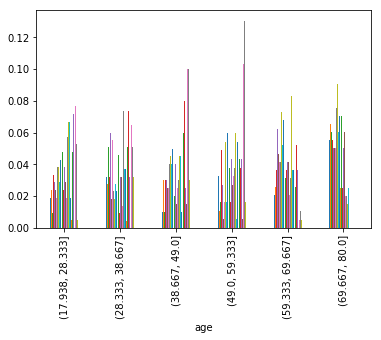

In [0]:
ct.plot(kind='bar',legend=False);

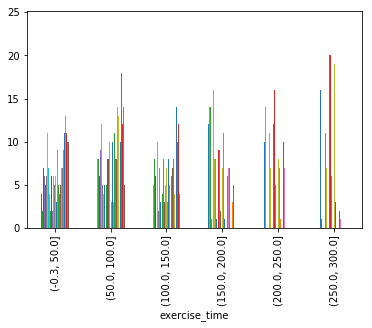

In [0]:
ct2 = pd.crosstab(exercise_time_bins, [age_bins, weight_bins])
ct2.plot(kind='bar', legend=False);

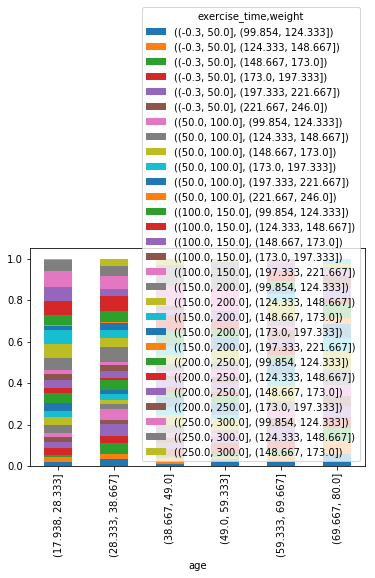

In [0]:
ct.plot(kind='bar', stacked=True,); #not one i will use 

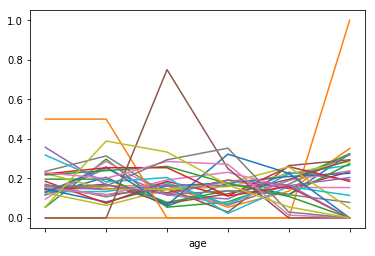

In [0]:
ct3 = pd.crosstab(age_bins, [exercise_time_bins, weight_bins], normalize='columns')
ct3.plot(legend=False); # yikes!! not one that i would want to use either 

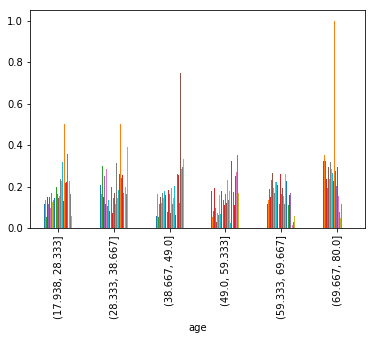

In [0]:
ct3.plot(kind='bar', legend=False); # not only does this look hideous but it doesnt give me any helpful insights  

In [0]:
## okay time to see what google has out there for helpful graphs... 
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [0]:
corr = ct3.corr()

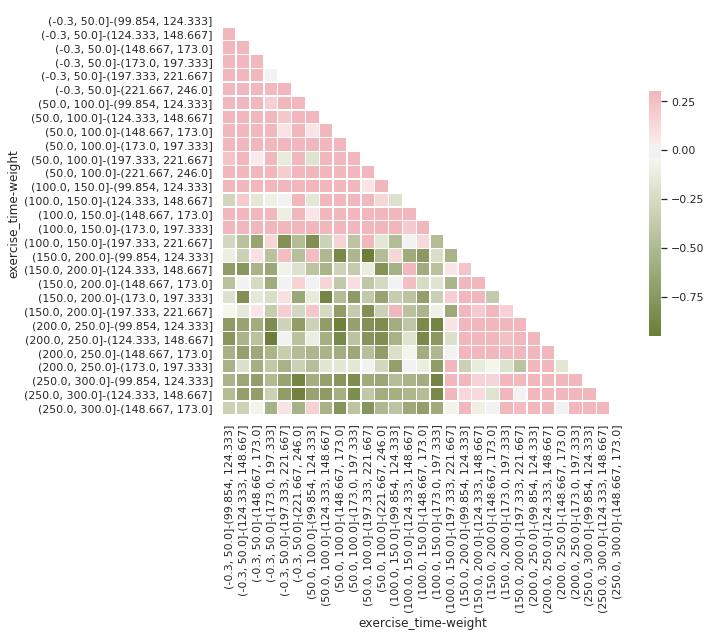

In [0]:
mask = np.zeros_like(corr, dtype=int)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(100, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# ok now this look way more helpful, only question is what am i looking at???
# ok so i see a pattern but why is there only exercise time and weight on the graph??
# does this type of graph only take two varibles??
# it looks pretty but not sure what it is saying lets do another one.


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [0]:
# 1. The varible types in the data are continuous data

# 2. 

# 3. spurious relationships would have to be the age to the other variables, Because it is some what associated but not causally related. 
# Now, on the other hand weight and exercise time are causally related. 

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)